In [51]:
import pandas as pd

products = pd.read_excel('products.xlsx')
products_old =pd.read_csv('products_old.csv')

In [52]:
products.describe()

,prod_id,cust_id,transaction_id,prod_unit_price,prod_unit_paid_amt,num_discount_date,pct_discount_rate
count,1.077000e+04,10770.000000,10770.000000,10770.000000,10370.000000,10770.000000,10370.000000
mean,9.784598e+08,722.384865,2750.004271,4.902912,3.729093,84.134819,0.158699
std,1.241112e+08,923.957990,11907.439225,9.351931,7.272121,73.577649,0.150217
min,1.455190e+08,2.000000,3.000000,0.065871,0.063865,0.000000,-2.454464
25%,9.991863e+08,187.000000,301.000000,1.438103,1.181363,30.000000,0.026900
50%,9.992611e+08,402.000000,751.500000,2.656061,2.032109,64.000000,0.112137
75%,9.994211e+08,877.000000,2037.000000,5.279402,3.963513,117.000000,0.279174
max,9.999997e+08,7862.000000,769890.000000,399.000000,315.866364,540.000000,0.677455


In [53]:
products.head()

,prod_id,cust_id,transaction_id,prod_unit_price,prod_unit_paid_amt,num_discount_date,pct_discount_rate
0,145519008,300,421,0.706300,0.386057,44,0.453410
1,145519009,416,682,0.708400,0.392471,50,0.445976
2,145519010,265,353,0.716220,0.382433,44,0.466040
3,145519011,303,421,0.710534,0.387548,46,0.454569
4,145519012,409,787,0.710840,0.396234,49,0.442584


In [54]:
products_old.head()

,prod_id,cust_id,transaction_id,avg_price,avg_disc_pct,wknd_sales,wknd_trans
0,145519008,300,421,0.706300,0.497814,0.120894,0.123515
1,145519009,416,681,0.708400,0.493008,0.139121,0.143695
2,145519010,265,353,0.716220,0.494498,0.129557,0.135977
3,145519011,303,420,0.710534,0.493429,0.132082,0.130641
4,145519012,409,786,0.710840,0.490354,0.112664,0.121982


In [57]:
products = products.drop(columns=['prod_unit_paid_amt', 'pct_discount_rate'])
products = products.merge(products_old.drop(columns=['cust_id','transaction_id', 'wknd_sales', 'wknd_trans'], axis=1), on='prod_id')
products.describe()

,prod_id,cust_id,transaction_id,prod_unit_price,num_discount_date,avg_price,avg_disc_pct
count,1.070300e+04,10703.000000,10703.000000,10703.000000,10703.000000,10703.000000,10703.000000
mean,9.783293e+08,726.283098,2766.184995,4.780328,84.655984,4.780328,0.307743
std,1.244881e+08,925.480888,11942.880298,8.096083,73.510801,8.096083,0.144520
min,1.455190e+08,5.000000,7.000000,0.065871,1.000000,0.065871,0.014141
25%,9.991864e+08,189.000000,307.000000,1.432033,30.000000,1.432033,0.183096
50%,9.992613e+08,406.000000,758.000000,2.641984,64.000000,2.641984,0.279905
75%,9.994212e+08,883.500000,2062.000000,5.220207,118.000000,5.220207,0.458223
max,9.999997e+08,7862.000000,769890.000000,395.363636,540.000000,395.363636,1.000000


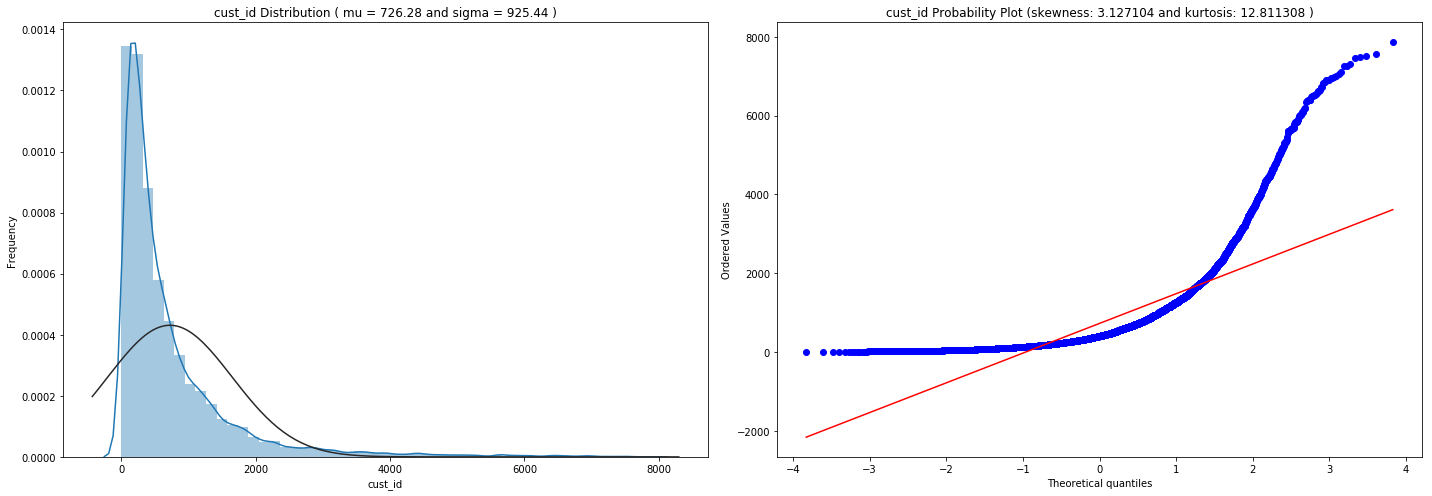

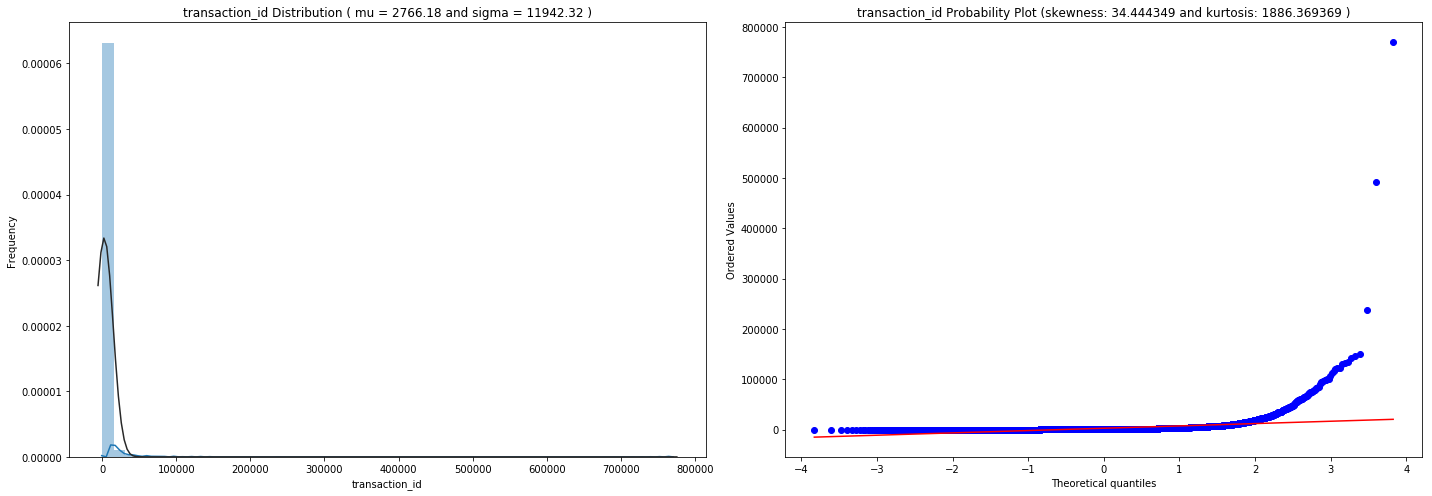

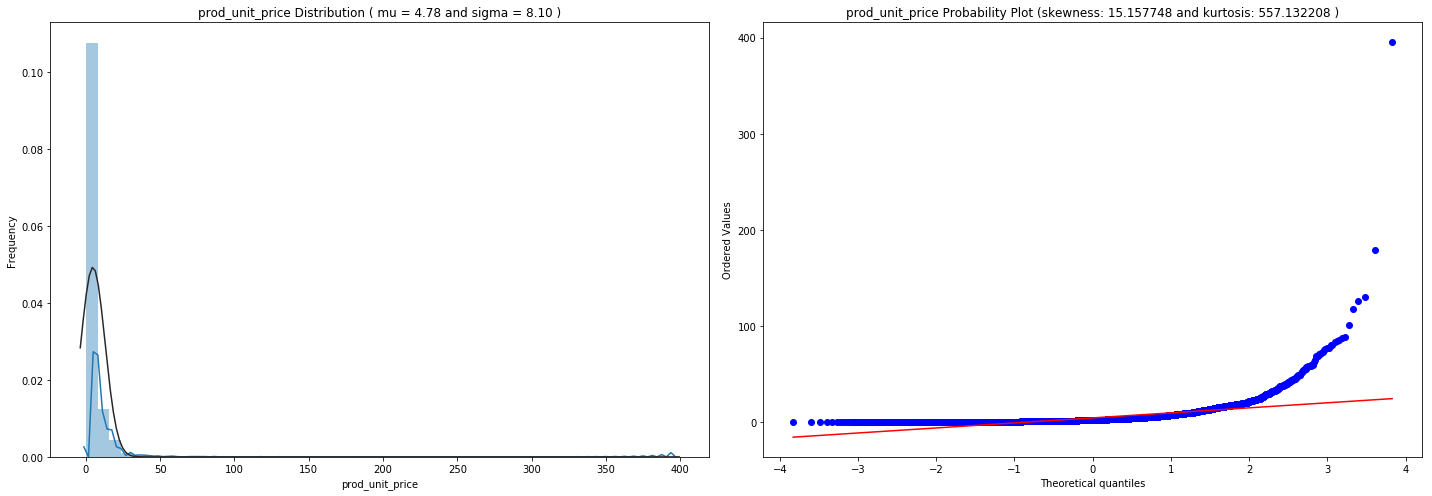

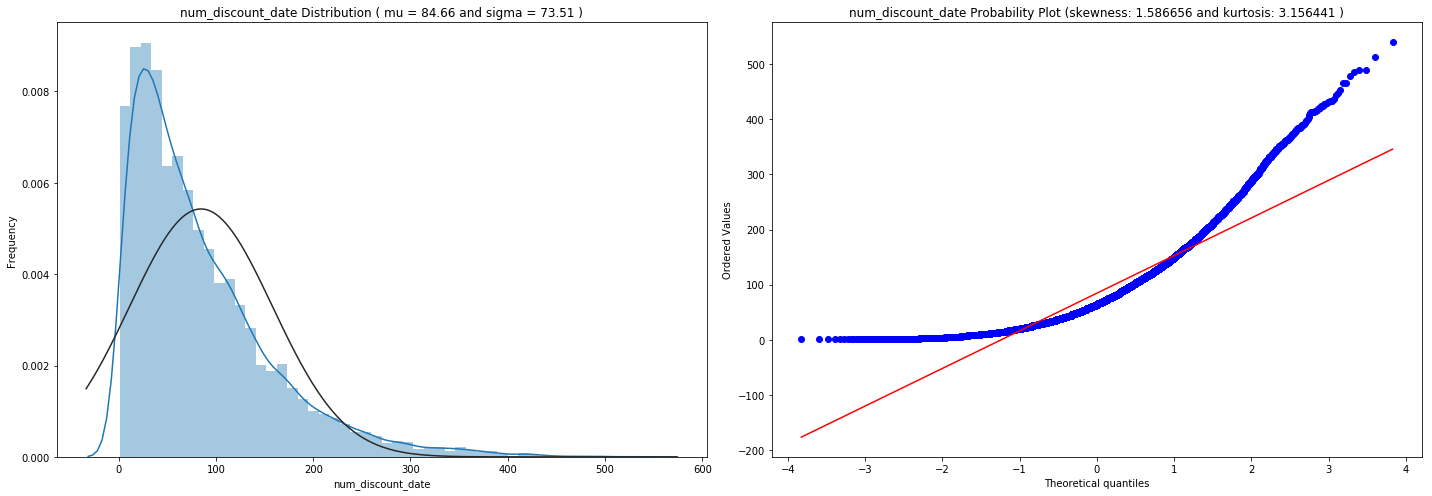

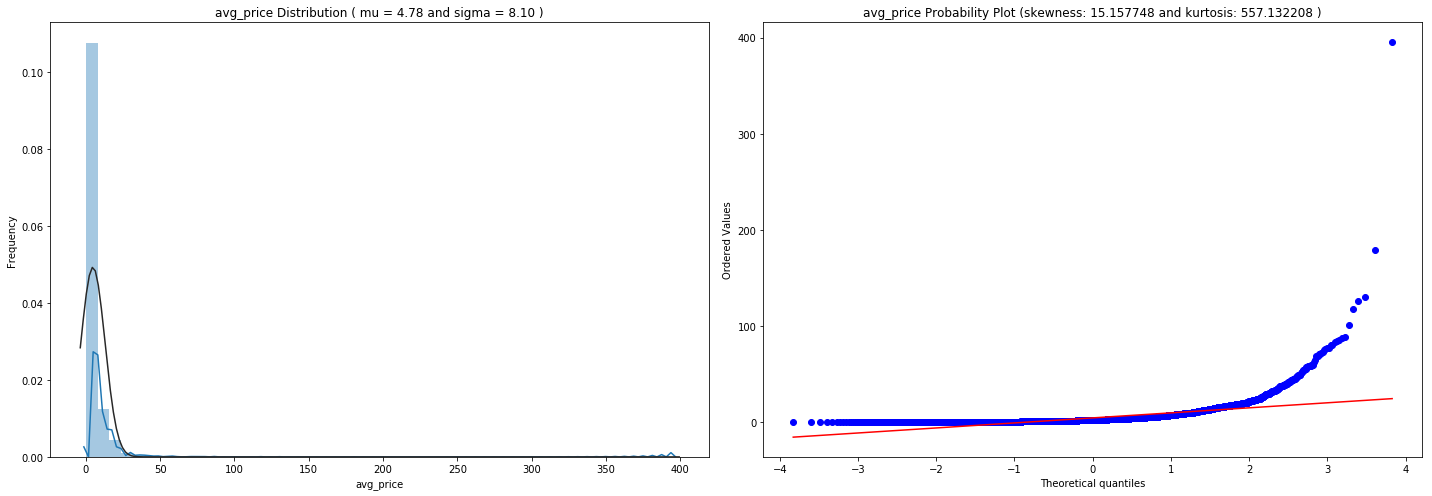

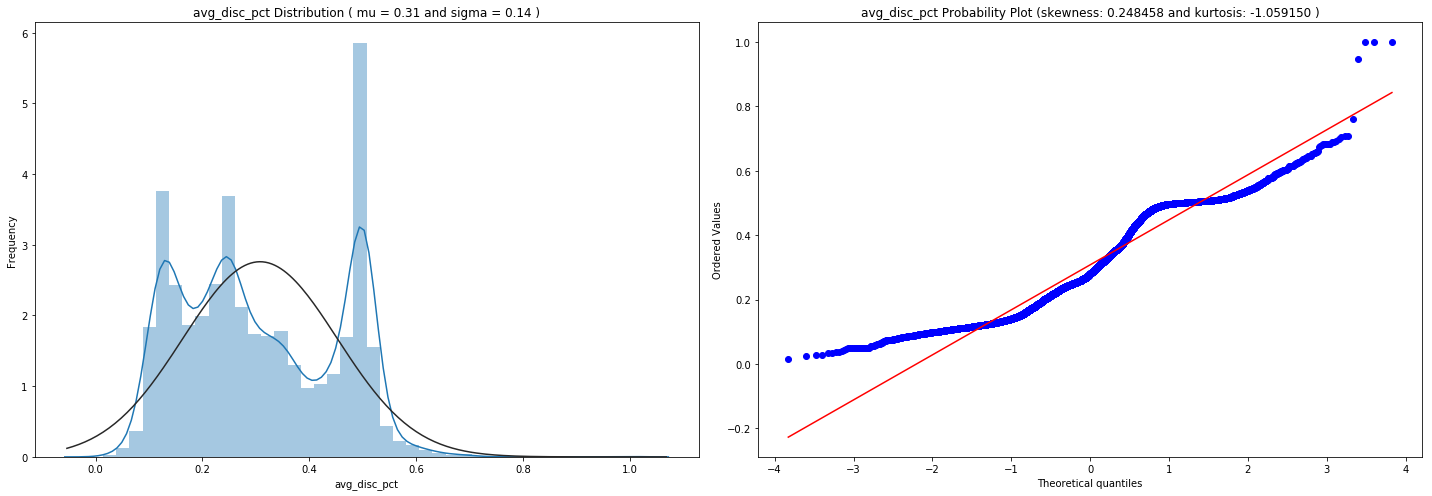

In [60]:
# Plot a distribution and Q-Q plot to identify departures from normality

import matplotlib.pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox
import seaborn as sns

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(products['cust_id'], 'cust_id')
QQ_plot(products['transaction_id'], 'transaction_id')
QQ_plot(products['prod_unit_price'], 'prod_unit_price')
QQ_plot(products['num_discount_date'], 'num_discount_date')
QQ_plot(products['avg_price'], 'avg_price')
QQ_plot(products['avg_disc_pct'], 'avg_disc_pct')

In [61]:
# Data Preprocessing
# Normalization: based on the varaince and range of each feature
# take log transformation for features that have high variance and range, and normalization for features have low variance and range

import math 
from sklearn import preprocessing

products['cust_id_T'] = products['cust_id'].apply(math.log)
products['transaction_id_T'] = products['transaction_id'].apply(math.log)
products['prod_unit_price_T'] = products['prod_unit_price'].apply(math.log)
products['num_discount_date_T'] = products['num_discount_date'].apply(math.log)
products['avg_price_T'] = products['avg_price'].apply(math.log)

In [62]:
# Standardization
features = products.columns.tolist()

# standarize all columns
features_std = [feature for feature in features if feature not in ['prod_id', 'cust_id', 'transaction_id', 'prod_unit_price', 'num_discount_date', 'avg_price']]
scaler = preprocessing.StandardScaler().fit(products[features_std])
products_std = scaler.transform(products[features_std])

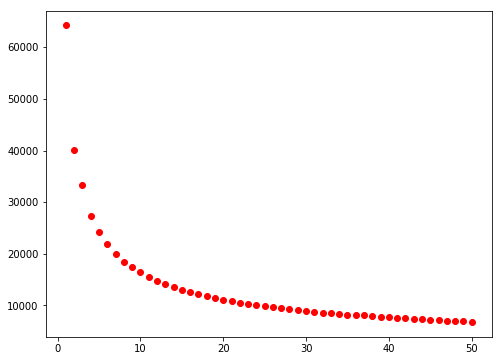

The best K sugest:  6


In [64]:
# K-means clustering

from sklearn.cluster import KMeans

cl = 50
# set threshold at 10%, if as k increases
corte = 0.1
# set a number for cost function
anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        # start with k-means++
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(products_std)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    # Elbow method for selecting the optimal number of clusters
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): 
        K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

print('The best K sugest: ',K_best)

In [65]:
# use k=6 to run model again
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

model = model.fit(products_std)

labels = model.labels_

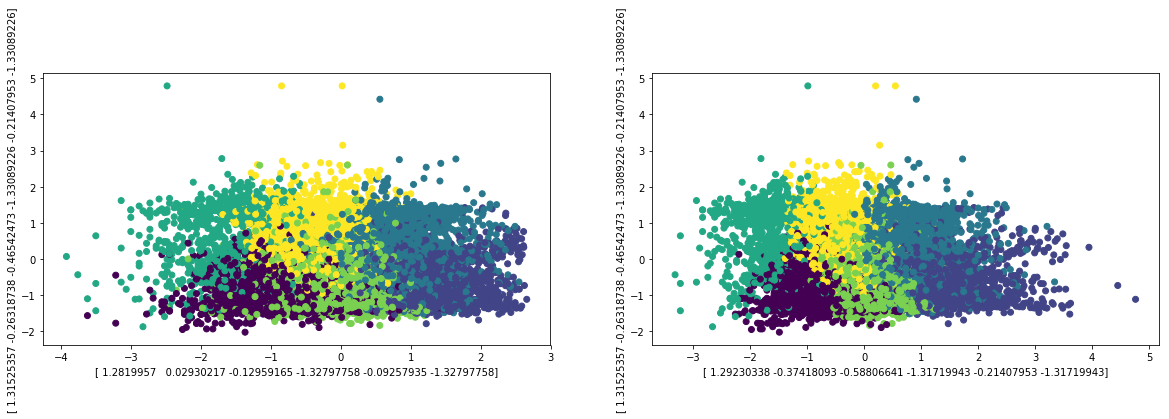

In [66]:
# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = products_std[:,1], y = products_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(products_std[1])
ax.set_ylabel(products_std[0])
ax = fig.add_subplot(122)
plt.scatter(x = products_std[:,2], y = products_std[:,0], c=model.labels_.astype(float))
ax.set_xlabel(products_std[2])
ax.set_ylabel(products_std[0])

plt.show()

In [67]:
# Calculate silhouette_score for k = 6

from sklearn.metrics import silhouette_samples, silhouette_score
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = products_std, labels = model.fit_predict(products_std))

0.2349951108164786

In [69]:
# Calculate silhouette_score for k = 5

model1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = products_std, labels = model3.fit_predict(products_std))

0.23796308142909364

In [70]:
# Calculate silhouette_score for k = 7

model2 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=41)

silhouette_score(X = products_std, labels = model4.fit_predict(products_std))

0.24309050479869077

In [92]:
# check center point of 6 clusters
import numpy as np

print("Centers of each cluster:")
cent_transformed = scaler.inverse_transform(model.cluster_centers_)
print(pd.DataFrame(np.exp(cent_transformed[:, -5:]), columns=['cust_id', 'transaction_id', 'prod_unit_price', 'num_discount_date', 'avg_price']))
print('-'*50)
print(pd.DataFrame(cent_transformed[:, :1], columns=['avg_disc_pct']))

Centers of each cluster:
       cust_id  transaction_id  prod_unit_price  num_discount_date  avg_price
0   146.647589      257.665843         4.863165          13.824134   4.863165
1  1688.702888     6301.258086         0.846436         139.481218   0.846436
2   991.980082     2289.445744         2.617298         130.055084   2.617298
3    62.588760       76.739442        17.373230          21.869318  17.373230
4   381.291688      820.981182         1.332325          42.148806   1.332325
5   266.340038      393.988311         4.918572          65.880272   4.918572
--------------------------------------------------
   avg_disc_pct
0      0.182563
1      0.222501
2      0.385198
3      0.412211
4      0.221557
5      0.448072


In [96]:
# Create new dataframe with lables in a new column

products_new = pd.concat([products.iloc[:, :7], pd.DataFrame(labels, columns=['class']), ], axis=1)

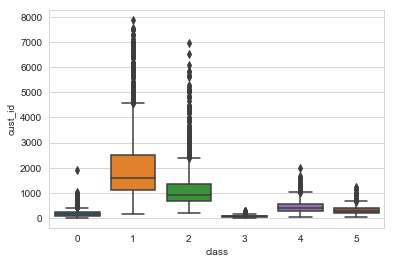

In [108]:
# Distribution of customers in each cluster

import seaborn as sns

sns.set_style("whitegrid")
sns.boxplot(x="class", y='cust_id', data=products_new)

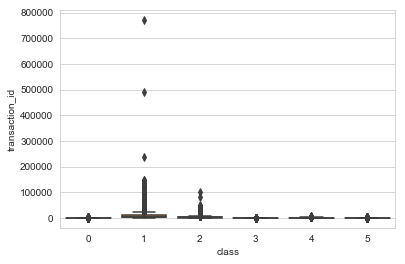

In [109]:
# Distribution of transactions in each cluster

sns.boxplot(x="class", y='transaction_id', data=products_new)

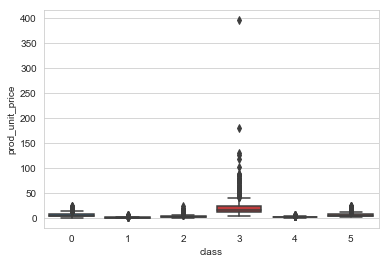

In [110]:
# Distribution of product unit price in each cluster

sns.boxplot(x="class", y='prod_unit_price', data=products_new)

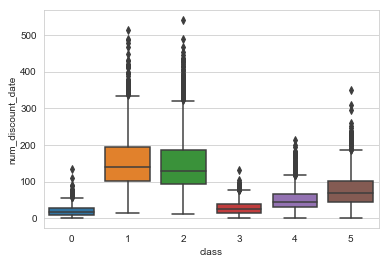

In [111]:
# Distribution of number of disctounted dates in each cluster

sns.boxplot(x="class", y='num_discount_date', data=products_new)

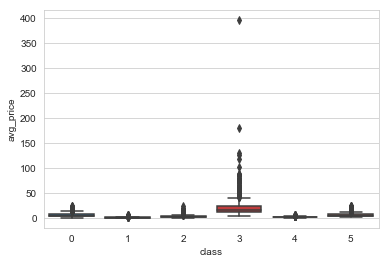

In [112]:
# Distribution of average product price in each cluster

sns.boxplot(x="class", y='avg_price', data=products_new)

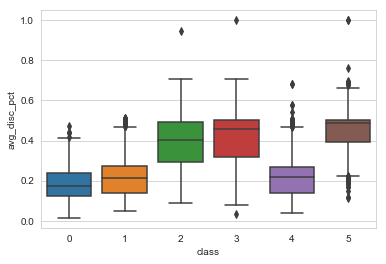

In [113]:
# Distribution of average discount percentage in each cluster

sns.boxplot(x="class", y='avg_disc_pct', data=products_new)

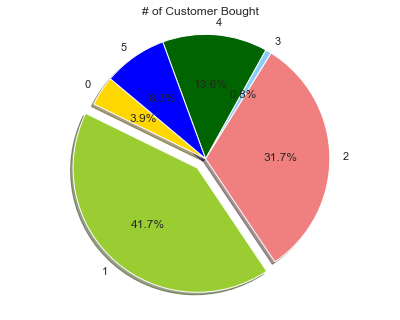

In [148]:
# Pie chart for customer size distribution

p1 = products_new[products_new['class'] == 0]['cust_id'].sum()
p2 = products_new[products_new['class'] == 1]['cust_id'].sum()
p3 = products_new[products_new['class'] == 2]['cust_id'].sum()
p4 = products_new[products_new['class'] == 3]['cust_id'].sum()
p5 = products_new[products_new['class'] == 4]['cust_id'].sum()
p6 = products_new[products_new['class'] == 5]['cust_id'].sum()

sns.set(rc={'figure.figsize':(6.7,5.27)})

# Data to plot
labels = '0', '1', '2', '3', '4', '5'
sizes = [p1, p2, p3, p4, p5, p6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darkgreen', 'blue']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('# of Customer Bought')
plt.show()

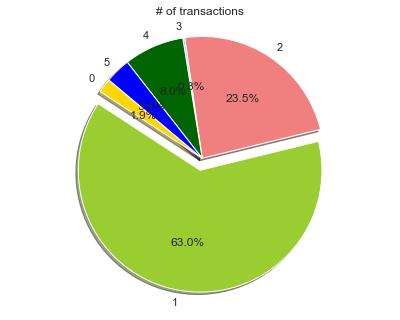

In [150]:
# Pie chart for transaction number distribution

p1 = products_new[products_new['class'] == 0]['transaction_id'].sum()
p2 = products_new[products_new['class'] == 1]['transaction_id'].sum()
p3 = products_new[products_new['class'] == 2]['transaction_id'].sum()
p4 = products_new[products_new['class'] == 3]['transaction_id'].sum()
p5 = products_new[products_new['class'] == 4]['transaction_id'].sum()
p6 = products_new[products_new['class'] == 5]['transaction_id'].sum()

sns.set(rc={'figure.figsize':(6.7,5.27)})

# Data to plot
labels = '0', '1', '2', '3', '4', '5'
sizes = [p1, p2, p3, p4, p5, p6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darkgreen', 'blue']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('# of transactions')
plt.axis('equal')
plt.show()

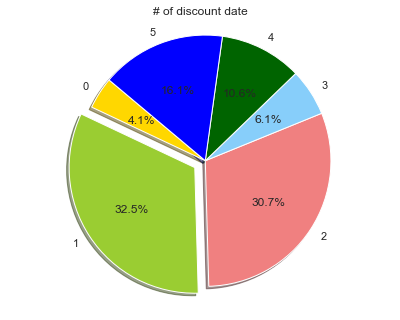

In [155]:
# Pie chart for number of discounted dates distribution

p1 = products_new[products_new['class'] == 0]['num_discount_date'].mean()
p2 = products_new[products_new['class'] == 1]['num_discount_date'].mean()
p3 = products_new[products_new['class'] == 2]['num_discount_date'].mean()
p4 = products_new[products_new['class'] == 3]['num_discount_date'].mean()
p5 = products_new[products_new['class'] == 4]['num_discount_date'].mean()
p6 = products_new[products_new['class'] == 5]['num_discount_date'].mean()

sns.set(rc={'figure.figsize':(6.7,5.27)})

# Data to plot
labels = '0', '1', '2', '3', '4', '5'
sizes = [p1, p2, p3, p4, p5, p6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darkgreen', 'blue']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('# of discount date')
plt.axis('equal')
plt.show()

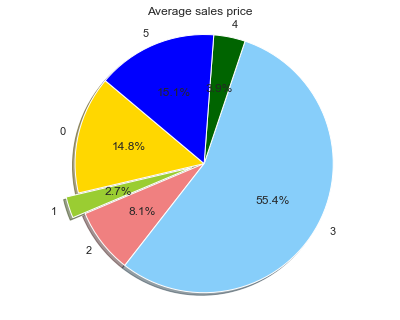

In [154]:
# Pie chart for average sales price distribution

p1 = products_new[products_new['class'] == 0]['avg_price'].mean()
p2 = products_new[products_new['class'] == 1]['avg_price'].mean()
p3 = products_new[products_new['class'] == 2]['avg_price'].mean()
p4 = products_new[products_new['class'] == 3]['avg_price'].mean()
p5 = products_new[products_new['class'] == 4]['avg_price'].mean()
p6 = products_new[products_new['class'] == 5]['avg_price'].mean()

sns.set(rc={'figure.figsize':(6.7,5.27)})

# Data to plot
labels = '0', '1', '2', '3', '4', '5'
sizes = [p1, p2, p3, p4, p5, p6]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darkgreen', 'blue']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Average sales price')
plt.axis('equal')
plt.show()